## Data Loading

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('question4-stock-data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
0,0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0
...,...,...,...,...,...,...,...,...
11286,11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700.0
11287,11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700.0
11288,11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0
11289,11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200.0


## EDA

##### There are 5175 missing dates in the dataset but most of those days are weekends

In [3]:
#caclculate the missing dates
date_range = pd.date_range(start='1980-03-21', end='2024-12-27')
missing_dates = date_range.difference(df['Date'])
missing_dates

DatetimeIndex(['1980-03-22', '1980-03-23', '1980-03-29', '1980-03-30',
               '1980-04-04', '1980-04-05', '1980-04-06', '1980-04-12',
               '1980-04-13', '1980-04-19',
               ...
               '2024-11-28', '2024-11-30', '2024-12-01', '2024-12-07',
               '2024-12-08', '2024-12-14', '2024-12-15', '2024-12-21',
               '2024-12-22', '2024-12-25'],
              dtype='datetime64[ns]', length=5176, freq=None)

##### Other dates could be market holidays and maybe some could be because of data gathering failuires. But because the number of missing dates are very low, it is not necessary to fill these data as ML models can handle these situations

In [4]:
missing_weekdays = missing_dates[~missing_dates.dayofweek.isin([5, 6])]  # Exclude Saturday (5) & Sunday (6)
missing_weekdays

DatetimeIndex(['1980-04-04', '1980-05-26', '1980-07-04', '1980-08-12',
               '1980-09-01', '1980-10-21', '1980-11-04', '1980-11-27',
               '1980-12-24', '1980-12-25',
               ...
               '2024-02-19', '2024-03-29', '2024-05-27', '2024-06-19',
               '2024-07-04', '2024-09-02', '2024-11-07', '2024-11-25',
               '2024-11-28', '2024-12-25'],
              dtype='datetime64[ns]', length=504, freq=None)

##### Checking the distributions of the features

In [5]:
df.describe()

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
count,11291.000000,11181,11198.000000,11174.000000,11196.000000,11164.000000,11188.000000,1.114600e+04
mean,5645.000000,2002-08-03 13:57:54.429836288,63.609130,72.026945,72.503100,71.665079,67.999259,2.144157e+05
min,0.000000,1980-03-17 00:00:00,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,2822.500000,1991-05-17 00:00:00,19.224636,27.500000,27.789255,27.536156,0.000000,1.350000e+04
50%,5645.000000,2002-07-26 00:00:00,50.608900,66.035000,66.724998,65.418751,66.065002,9.032350e+04
75%,8467.500000,2013-10-21 00:00:00,104.723621,114.297503,114.892500,113.639999,114.269997,2.915750e+05
max,11290.000000,2024-12-27 00:00:00,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07
std,3259.575279,NaN,52.266247,51.259828,51.550735,51.011632,55.834401,3.883662e+05


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Volume'}>, <Axes: >]], dtype=object)

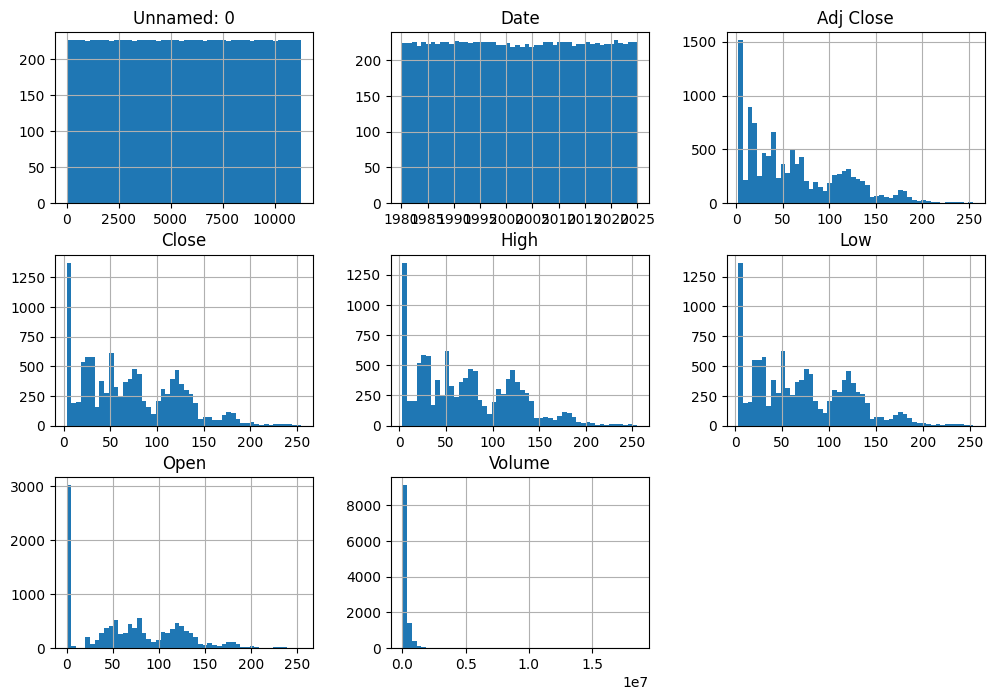

In [6]:
df.hist(figsize=(12, 8), bins=50)

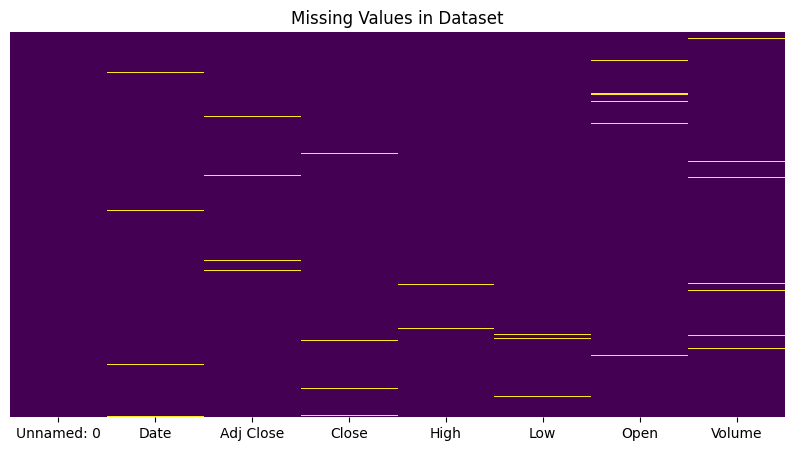

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()

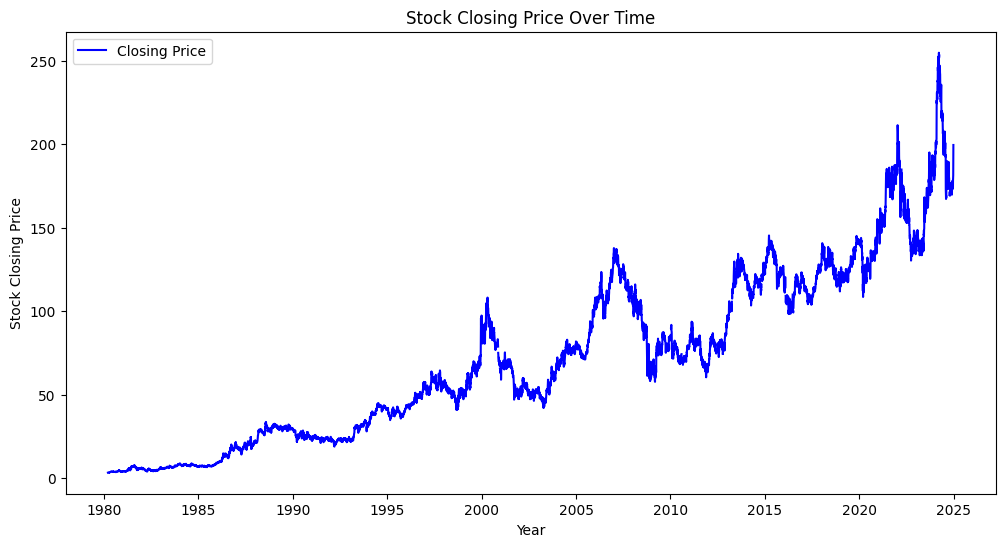

In [8]:
# Plot Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label="Closing Price", color="blue")
plt.xlabel("Year")
plt.ylabel("Stock Closing Price")
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.show()

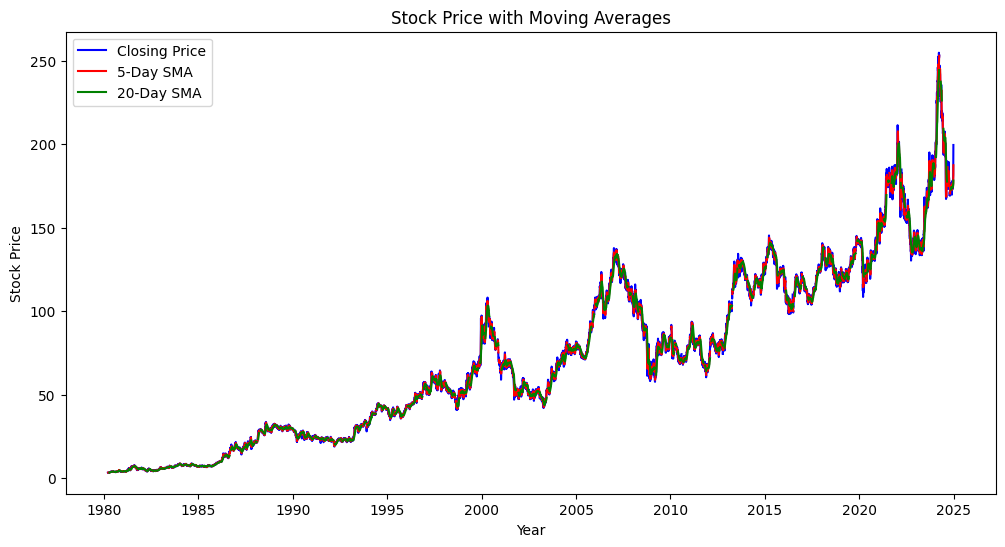

In [9]:
# Compute moving averages
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# Plot closing price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label="Closing Price", color="blue")
plt.plot(df['Date'], df['SMA_5'], label="5-Day SMA", color="red")
plt.plot(df['Date'], df['SMA_20'], label="20-Day SMA", color="green")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()

C:\Users\Tharusha\AppData\Local\Temp\ipykernel_4632\1474419179.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Daily_Return'] = df['Close'].pct_change()


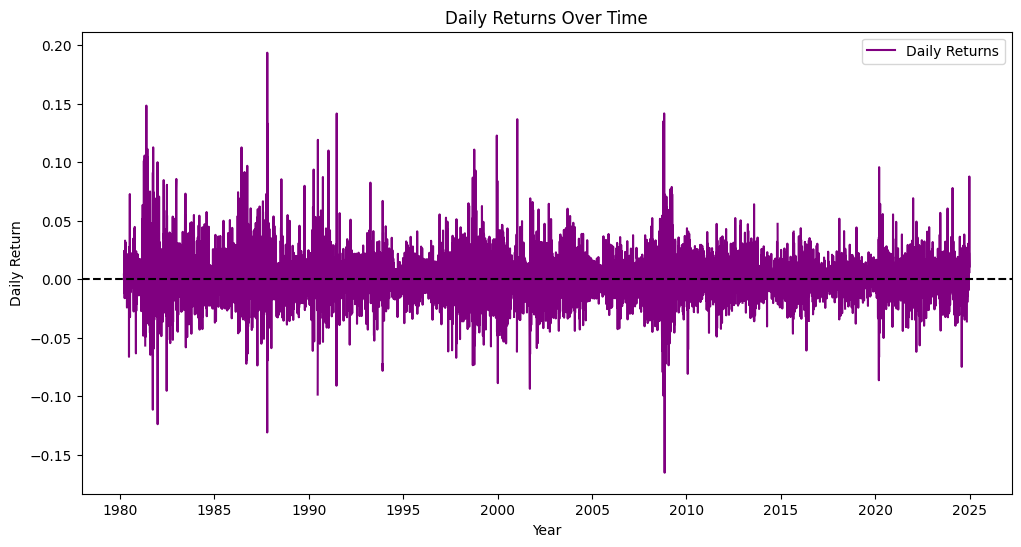

In [10]:
# Compute daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Return'], label="Daily Returns", color="purple")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Year")
plt.ylabel("Daily Return")
plt.title("Daily Returns Over Time")
plt.legend()
plt.show()

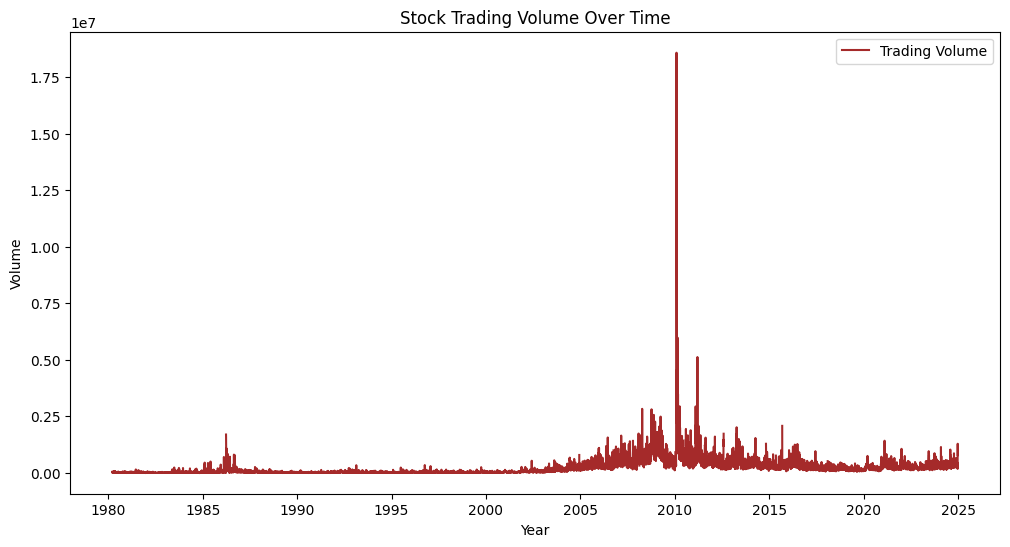

In [11]:
# Plot Volume Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label="Trading Volume", color="brown")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.title("Stock Trading Volume Over Time")
plt.legend()
plt.show()

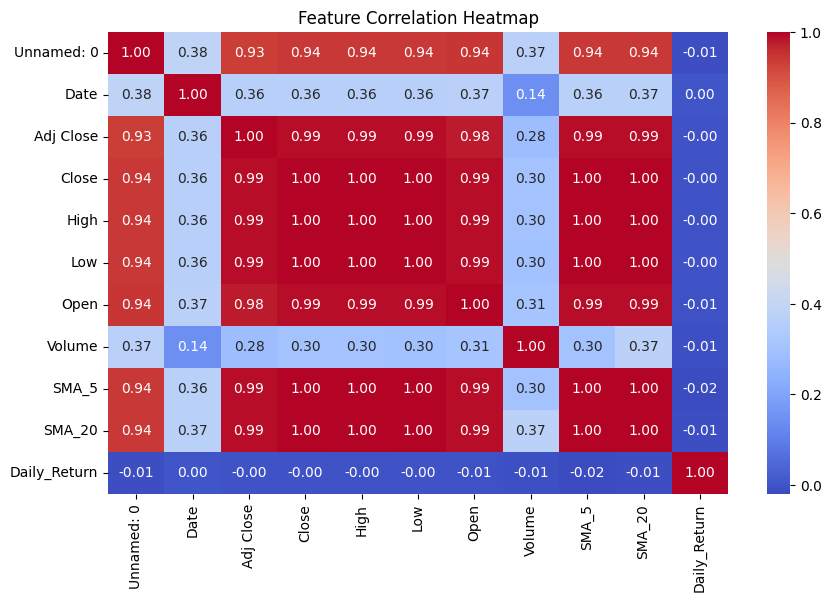

In [12]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

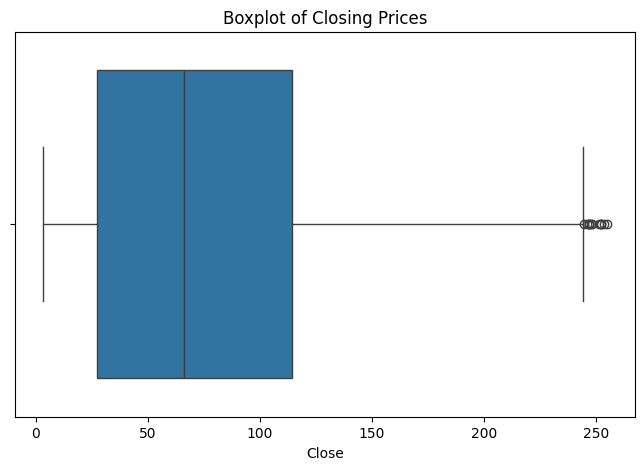

In [13]:
# Boxplot of Closing Prices
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Close'])
plt.title("Boxplot of Closing Prices")
plt.show()

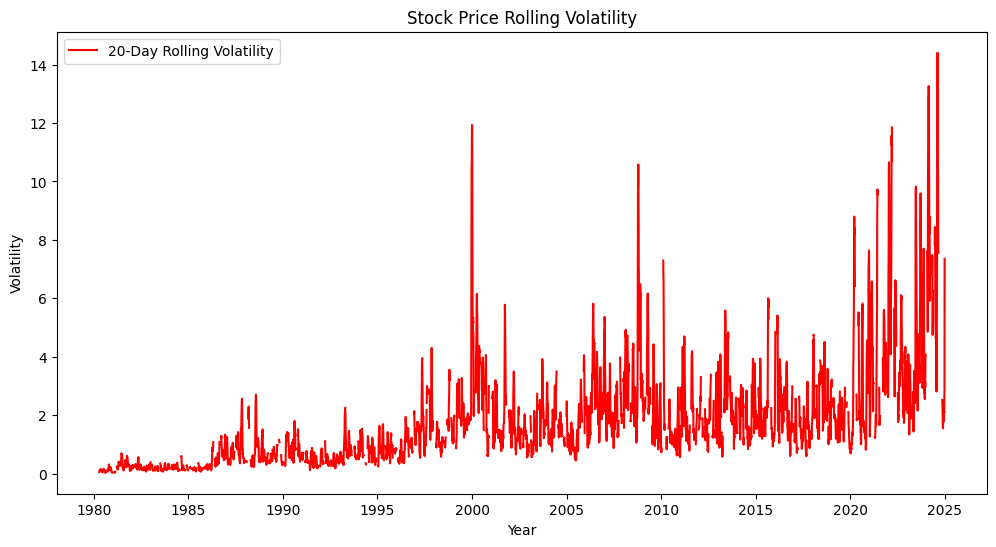

In [14]:
# Compute rolling standard deviation (volatility)
df['Rolling_Volatility'] = df['Close'].rolling(window=20).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Rolling_Volatility'], label="20-Day Rolling Volatility", color="red")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.title("Stock Price Rolling Volatility")
plt.legend()
plt.show()

## Feature Engineering

In [15]:
import pandas as pd

def calculate_RSI(df, period=14):
    delta = df['Close'].diff(1)  # Price change between days
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()  # Average gain
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()  # Average loss

    RS = gain / loss  # Relative Strength
    RSI = 100 - (100 / (1 + RS))  # RSI formula

    df['RSI'] = RSI
    return df

def calculate_VWAP(df):
    df['Typical_Price'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['Cumulative_PV'] = (df['Typical_Price'] * df['Volume']).cumsum()
    df['Cumulative_Volume'] = df['Volume'].cumsum()
    
    df['VWAP'] = df['Cumulative_PV'] / df['Cumulative_Volume']
    return df

In [16]:
df['average'] = (df['High'] + df['Low'] + df['Close'])/3
df = calculate_VWAP(df)
df['20D-EMA'] = df['Close'].ewm(span=20, adjust=False).mean()
df['100D-EMA'] = df['Close'].ewm(span=100, adjust=False).mean()
df = calculate_RSI(df)
df['dayofweek'] = df['Date'].dt.dayofweek

In [17]:
df

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume,SMA_5,SMA_20,...,Rolling_Volatility,average,Typical_Price,Cumulative_PV,Cumulative_Volume,VWAP,20D-EMA,100D-EMA,RSI,dayofweek
0,0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0,NaN,NaN,...,NaN,3.309066,3.309066,1.360324e+05,4.110900e+04,3.309066,3.291227,3.291227,NaN,0.0
1,1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0,NaN,NaN,...,NaN,3.322445,3.322445,1.670740e+05,5.045200e+04,3.311543,3.292501,3.291492,NaN,1.0
2,2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0,NaN,NaN,...,NaN,3.304606,3.304606,1.670740e+05,5.045200e+04,3.311543,3.293654,3.291752,NaN,2.0
3,3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0,NaN,NaN,...,NaN,3.322445,3.322445,2.012187e+05,6.072900e+04,3.313388,3.294697,3.292006,NaN,3.0
4,4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0,3.317985,NaN,...,NaN,3.402719,3.402719,2.298322e+05,6.913800e+04,3.324253,3.303286,3.293845,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11286,11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700.0,174.706000,174.859999,...,2.196457,177.976664,177.976664,2.313611e+11,2.387225e+09,96.916321,175.047400,180.412718,56.592188,4.0
11287,11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700.0,175.945999,175.162499,...,2.522221,179.679998,179.679998,2.314371e+11,2.387648e+09,96.930973,175.561933,180.413457,61.130572,0.0
11288,11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0,177.575998,175.442499,...,2.884973,181.326665,181.326665,2.314676e+11,2.387817e+09,96.936932,176.120796,180.433586,66.835454,1.0
11289,11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200.0,182.323999,176.684499,...,5.615406,196.163335,196.163335,2.317189e+11,2.389098e+09,96.990144,178.143577,180.768763,82.521281,3.0


## Model Building

##### Because of the high correlation among the features we can use only a set of those features for model building

In [18]:
df_model = df[['Close', 'Volume', 'VWAP', 'RSI', 'dayofweek']]
df_model = df_model.dropna()
df_model

,Close,Volume,VWAP,RSI,dayofweek
13,3.237711,0.0,3.300472,39.999964,3.0
14,3.237711,934.0,3.300216,39.999964,0.0
15,3.237711,44846.0,3.290602,36.842100,1.0
16,3.344743,42044.0,3.302688,55.555563,2.0
17,3.384880,35503.0,3.315110,60.000012,3.0
...,...,...,...,...,...
11286,178.169998,425700.0,96.916321,56.592188,4.0
11287,180.449997,422700.0,96.930973,61.130572,0.0
11288,181.429993,168600.0,96.936932,66.835454,1.0
11289,197.360001,1281200.0,96.990144,82.521281,3.0


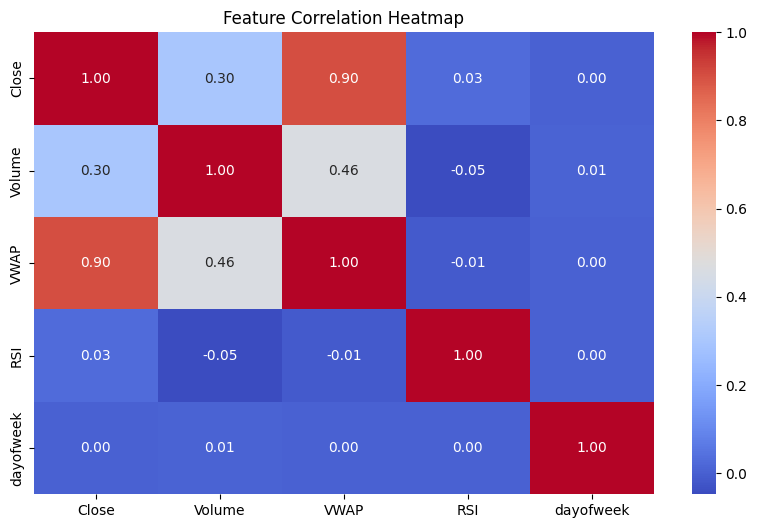

In [19]:
# Compute correlation matrix
correlation_matrix = df_model.corr()

# Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df_model = df_model.sort_index()

# Select features and target
features = ["Volume", "VWAP", "RSI", "dayofweek"]
target = "Close"

# Scaling the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

df_model[features] = scaler_X.fit_transform(df_model[features])
df_model[target] = scaler_y.fit_transform(df_model[[target]])

# Define sequence length
sequence_length = 20  # Using past 20 days to predict next 5 days

def create_sequences(data, target, seq_length, forecast_horizon):
    X, y = [], []
    for i in range(len(data) - seq_length - forecast_horizon + 1):
        X.append(data.iloc[i:i+seq_length].values)
        y.append(data[target].iloc[i+seq_length:i+seq_length+forecast_horizon].values)
    return np.array(X), np.array(y)

X, y = create_sequences(df_model, target, sequence_length, forecast_horizon=5)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5, shuffle=False)

In [21]:
# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(5)  # Predicting next 5 days
])

model.compile(optimizer="adam", loss="mse")

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


c:\Users\Tharusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


334/334 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0182 - val_loss: 9.8670e-04
Epoch 2/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 8.6237e-04 - val_loss: 0.0014
Epoch 4/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.1441e-04 - val_loss: 8.7796e-04
Epoch 5/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5.7590e-04 - val_loss: 0.0017
Epoch 6/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.3575e-04 - val_loss: 0.0013
Epoch 7/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5.1113e-04 - val_loss: 0.0011
Epoch 8/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.9882e-04 - val_loss: 8.7595e-04
Epoch 9/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4.5041e-04 - val_loss: 0.0031
Epoch 10/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.1610e-04 - val_loss: 9.1263e-04


In [22]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions
y_pred_actual = scaler_y.inverse_transform(y_pred)
y_test_actual = scaler_y.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


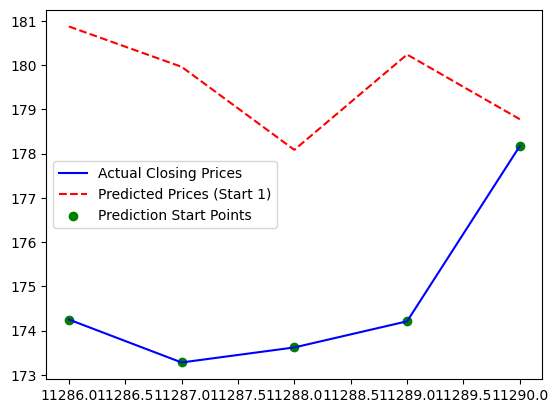

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of days ahead you're forecasting
forecast_horizon = 5

# Generate a range of dates corresponding to the test set
test_dates = df_model.index[-len(y_test_actual):]

# Ensure forecast horizon is defined correctly
forecast_horizon = 5

# Plot actual closing prices
plt.plot(test_dates, y_test_actual[:, 0], label="Actual Closing Prices", color="blue")

# Plot predicted closing prices
for i in range(len(y_pred_actual)):
    if i + forecast_horizon <= len(test_dates):  # Ensure we have enough dates
        plt.plot(test_dates[i:i + forecast_horizon], y_pred_actual[i], linestyle="--", color="red", label=f'Predicted Prices (Start {i + 1})')

# Highlight the start of each prediction
plt.scatter(test_dates[:len(y_pred_actual)], y_test_actual[:, 0], color="green", marker="o", label="Prediction Start Points")

plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE for each prediction day (5-day forecast)
rmse_per_day = [np.sqrt(mean_squared_error(y_test_actual[:, i], y_pred_actual[:, i])) for i in range(y_test_actual.shape[1])]

# Compute overall RMSE across all forecasted days
overall_rmse = np.sqrt(mean_squared_error(y_test_actual.flatten(), y_pred_actual.flatten()))

print("RMSE per day:", rmse_per_day)
print("Overall RMSE:", overall_rmse)

RMSE per day: [6.845285208987477, 5.148246001761644, 3.0227521191995073, 7.848860351260773, 12.025019950768591]
Overall RMSE: 7.598751351256845
